In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = 'dec_05'
objphys = pd.read_csv(os.path.join(datadir, 'obj_phys_properties.csv'))
objphys[0:3]

FileNotFoundError: File b'dec_05/obj_phys_properties.csv' does not exist

In [7]:
objfit = pd.read_csv(os.path.join('objname_data.txt', skipinitialspace=True)
objfit[0:3]

SyntaxError: invalid syntax (<ipython-input-7-b8a6370d59de>, line 2)

In [9]:
cols = objfit.columns.values
cols[0] = 'name'
objfit.columns = cols

In [10]:
allobj = objfit.merge(objphys)

In [11]:
allobj.columns

Index(['name', 'Nobs', 'Nobs_g', 'Nobs_r', 'Nobs_i', 'Nights', 'Period', 'g-r',
       'a', 'e', 'inc', 'H', 'diam', 'rot', 'sdssa', 'aerr', 'u', 'uerr', 'g',
       'gerr', 'i', 'ierr', 'z', 'zerr'],
      dtype='object')

In [13]:
knownrot = allobj.query('rot > 0')

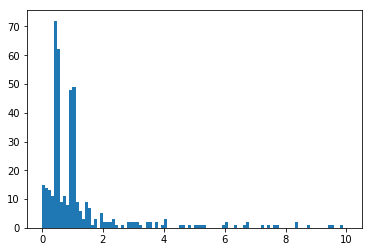

In [25]:
n, b, p = plt.hist((knownrot.Period * 24.0/knownrot.rot), bins=100, range=[0, 10])

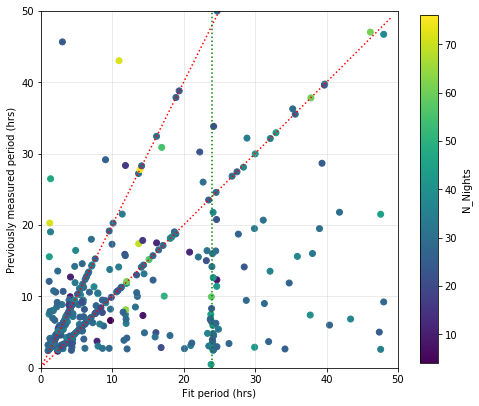

In [71]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(knownrot.Period * 24.0, knownrot.rot, c=knownrot.Nights)
plt.colorbar(shrink=0.8, label='N_Nights')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, 2*x, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.xlabel('Fit period (hrs)')
plt.ylabel('Previously measured period (hrs)')

In [50]:
days = knownrot.query('Period > 0.9 and Period < 1.1')
days[['name', 'Period', 'rot']]

,name,Period,rot
39,78550,1.026959,12.32500
95,283729,1.003814,5.93700
112,2018LQ02,0.993127,0.47185
187,5438,0.946725,26.00000
214,5871,0.927179,30.21000
258,65996,1.097687,3.39900
261,90092,1.004487,2.45400
290,17428,1.007345,6.03400
436,24242,1.029023,49.94000
477,377634,0.991635,7.47700


In [18]:
knownrot.query('rot > 100')[['name', 'Period', 'rot', 'a', 'e', 'inc']]

,name,Period,rot,a,e,inc
163,8026,1.144316,372.000,1.93,0.0750,19.90
264,3571,1.255414,421.100,3.94,0.1120,7.86
304,31173,0.715570,122.800,1.93,0.1040,20.40
409,1954,1.529982,136.400,2.94,0.3130,14.80
533,15312,1.186813,149.383,2.74,0.1440,5.84
553,37586,0.947819,900.000,2.33,0.2020,22.20
618,23958,0.959717,562.000,5.23,0.0985,24.90
659,1573,1.229611,252.000,2.37,0.2310,24.50
730,131381,1.942113,227.405,3.14,0.1390,18.90
760,15701,0.692856,109.416,2.44,0.1840,1.22


(0, 60)

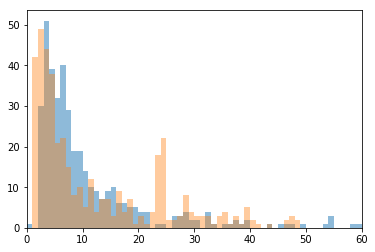

In [84]:
n, b, p  = plt.hist(knownrot.rot, bins=100, range=[0, 100], alpha=0.5)
n, b, p  = plt.hist(knownrot.Period * 24.0, bins=b, alpha=0.4)
plt.xlim(0, 60)

In [87]:
from astropy.time import Time
t = Time('2018-08-20T06:27:28.996', scale='tai', format='isot')

In [89]:
t.utc.mjd

58350.26865736111